# Baseball Case Study

###### Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

##### Import all needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###### Import Dataset:-

In [2]:
baseball=pd.read_csv('Baseball Case Study.csv')

In [3]:
#create another dataframe to set Target variable as last column
df=baseball.iloc[:,1:]

In [4]:
df['Win']=baseball.iloc[:,0]

In [5]:
#display dataframe
df.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,Win
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74


In [6]:
df.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E', 'Win'],
      dtype='object')

### About Column:-

###### 1. Runs(R)

In this column contain the number of runs scored in match.

###### 2.At Bats(AB)

In this column contain the number of bats

###### 3.Hits(H)

In column contain the Number of Hits that bats man hit in the match

###### 4.Doubles(2B)

In this column contain the number of doubles that bats man hits in match

###### 5.Triples

In this column contain the number of triples that bats man hits in match

###### 6.Home runs(HR)

In this column contain the Home Runs in that match

###### 7.Walks(BB)

In this column contain the Walks in match

###### 8.Strike Outs(SO)

In this column contain the strike outs in the match

###### 9.Stolen Bases(SB)

In this column contain the stolen bases in match

###### 10.Runs Allowed(RA)

In this column contain the Number of Runs Allowed in match

###### 11.Earned Run(ER)

In this column contain the Earned Runs in match

###### 12.Earned Runs Average(ERA)

In this column contain the Earned Runs Average in matchs

###### 13.Complete Games

In this column contain the Complete Games 

###### 14.Shut Outs 

In this column contain the Number of Shut Outs in match

###### 15.Saves(S)

In this column contain that number of saves in match

###### 16.Errors(E)

In this column contain that number of Errors in match

###### 17.Wins(W)

In this column contain that number of wins 

## Exploratory Data Analysis(EDA)

###### checking shape of dataset

In [7]:
df.shape

(30, 17)

30 rows and 17 columns in dataset

###### Checking Datatypes

In [8]:
df.dtypes

R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
Win      int64
dtype: object

Execpt ERA(Earned Run Average) is only column float others are integers

###### Checking Spaces in Dataset

In [9]:
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E, Win]
Index: []
Empty DataFrame
Columns: [R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E, Win]
Index: []
Empty DataFrame
Columns: [R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E, Win]
Index: []
Empty DataFrame
Columns: [R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E, Win]
Index: []
Empty DataFrame
Columns: [R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E, Win]
Index: []
Empty DataFrame
Columns: [R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E, Win]
Index: []
Empty DataFrame
Columns: [R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E, Win]
Index: []
Empty DataFrame
Columns: [R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E, Win]
Index: []
Empty DataFrame
Columns: [R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E, Win]
Index: []
Empty DataFrame
Columns: [R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, 

There is no spaces in dataframe

###### Checking null values

<AxesSubplot:>

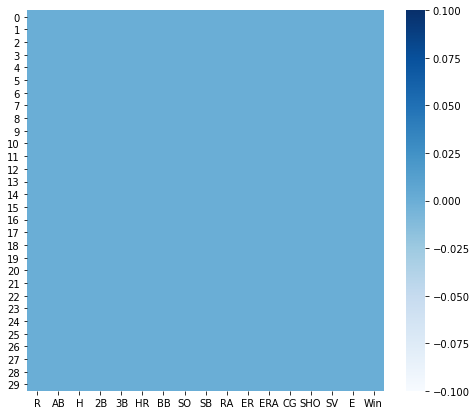

In [10]:
#checking null values using heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df.isnull(),cmap='Blues')

In [11]:
#checking null values
df.isnull().sum()

R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
Win    0
dtype: int64

There is no null values in dataframe

###### Checking information of dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       30 non-null     int64  
 1   AB      30 non-null     int64  
 2   H       30 non-null     int64  
 3   2B      30 non-null     int64  
 4   3B      30 non-null     int64  
 5   HR      30 non-null     int64  
 6   BB      30 non-null     int64  
 7   SO      30 non-null     int64  
 8   SB      30 non-null     int64  
 9   RA      30 non-null     int64  
 10  ER      30 non-null     int64  
 11  ERA     30 non-null     float64
 12  CG      30 non-null     int64  
 13  SHO     30 non-null     int64  
 14  SV      30 non-null     int64  
 15  E       30 non-null     int64  
 16  Win     30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


###### Observations:-

1. There are 30 Entries
2. There are 17 columns(variables)
3. Only 1 Variable is Float
4. 16 Variables are Integers
5. Memory usage is 4.1 KB

In [13]:
#describe the dataframe
df.describe()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,Win
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


###### observations:-

1. Observe the count there is no null values .
2. Observe the mean and 50% there is a skewness in H,HR,SO And ER columns
3. There is a outliers in R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV And E columns

###### Checking Correlation with dataset

<AxesSubplot:>

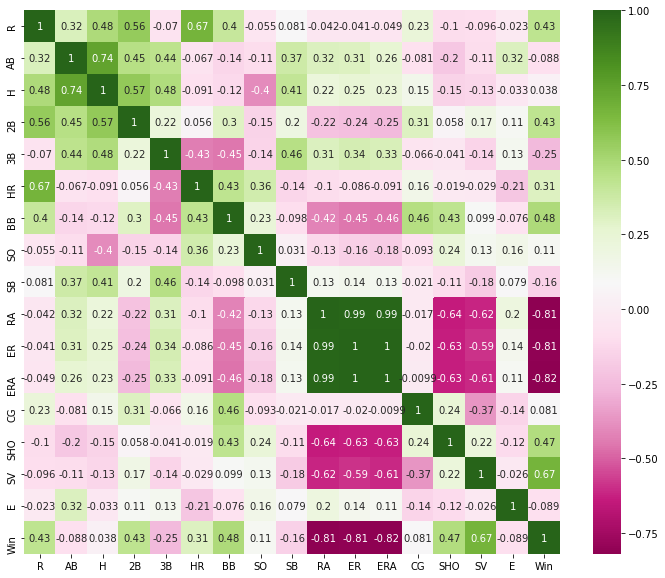

In [14]:
#checking correlations using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

###### Observations:-

1. ERA is Good Correlation with ER
2. ERA is Good Correlation with RA
3. ER is Good Correlation with RA
4. ERA are negative correlation with SHO
5. ERA are negative correlation with SV

In [15]:
#checking correlation each other
df.corr()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,Win
R,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.430751
AB,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.087947
H,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,0.037612
2B,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.427797
3B,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.251118
HR,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.307407
BB,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.484342
SO,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.111850
SB,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.157234
RA,-0.041623,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.016659,-0.636862,-0.616224,0.198996,-0.812952


###### Checking Correlation with target variable

In [16]:
df_target=df.corr()

In [17]:
df_target['Win'].sort_values(ascending=False)

Win    1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: Win, dtype: float64

###### Observations:-

1. ERA , ER And RA columns are highly negtive correlation with Win column(Target column) .
2. SV , SHO , BB , 2B And R columns are Good Correlations with win column(Target column) .

###### Scatter Plots

In [18]:
sns.set_theme()

<AxesSubplot:xlabel='R', ylabel='Win'>

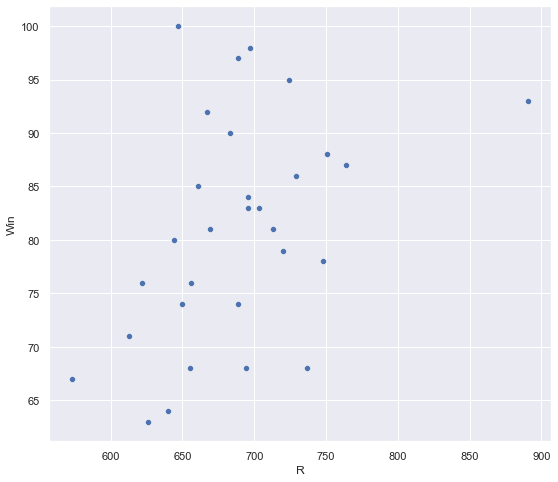

In [19]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='R',y='Win',data=df)

Runs (R) is positive correlation with win . If Runs is increase means chance of winning also increase .

<AxesSubplot:xlabel='AB', ylabel='Win'>

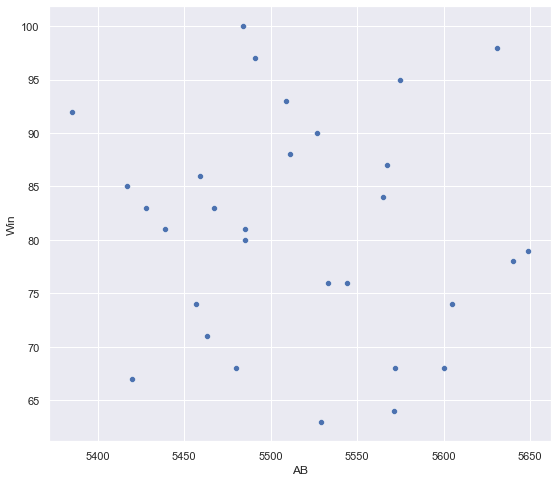

In [20]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='AB',y='Win',data=df)

At bats are increase means winning chances are decrease. At bats are negativily correlation with wins  

<AxesSubplot:xlabel='H', ylabel='Win'>

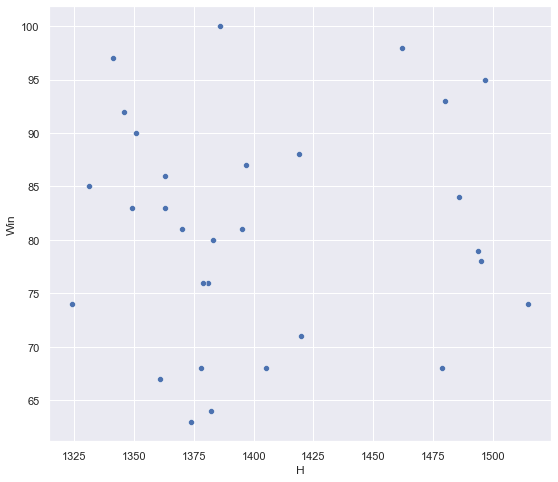

In [21]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='H',y='Win',data=df)

If Hits are increase means chance of winning also increase

<AxesSubplot:xlabel='2B', ylabel='Win'>

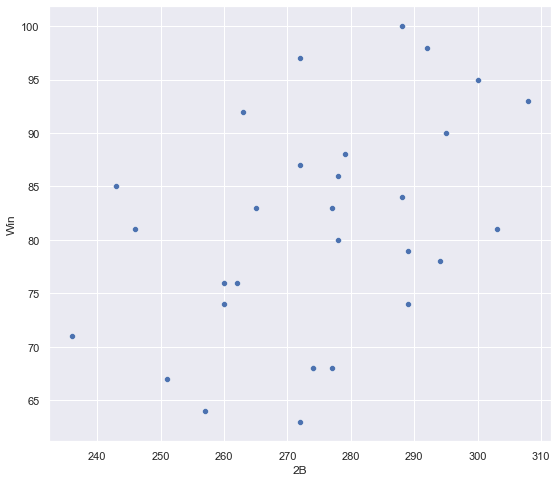

In [22]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='2B',y='Win',data=df)

If  doubles are increase means chance of winning also increase

<AxesSubplot:xlabel='3B', ylabel='Win'>

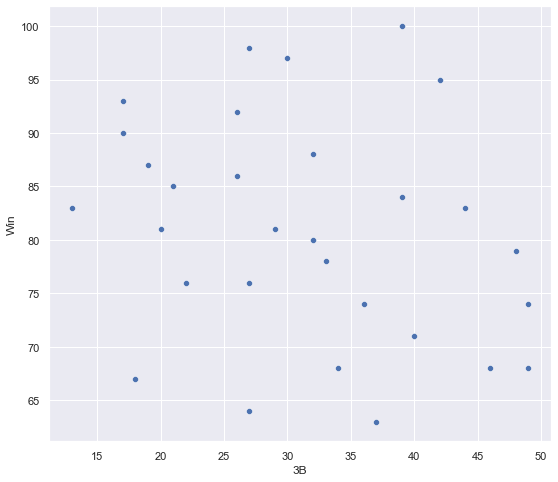

In [23]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='3B',y='Win',data=df)

If triples are increase means chance of winning is decrease

<AxesSubplot:xlabel='HR', ylabel='Win'>

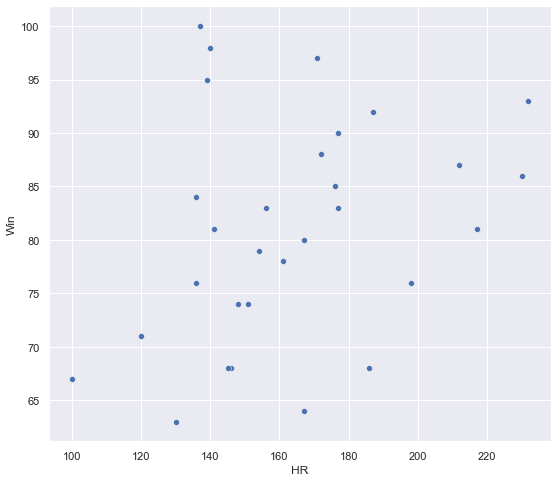

In [24]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='HR',y='Win',data=df)

If Home Runs are increase means chance of winnings also increase

<AxesSubplot:xlabel='BB', ylabel='Win'>

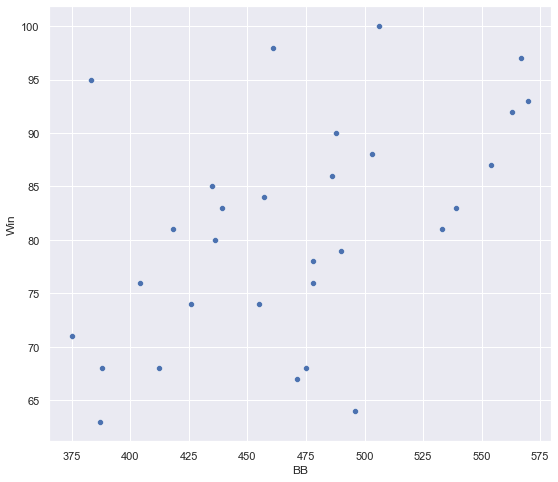

In [25]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='BB',y='Win',data=df)

If Walks are increase means chance of winning also increase

<AxesSubplot:xlabel='SO', ylabel='Win'>

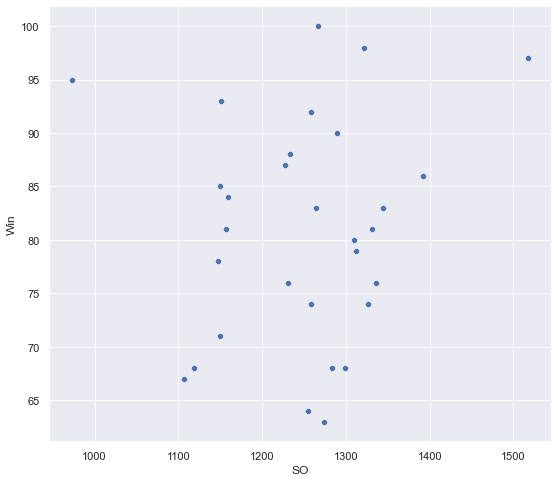

In [26]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='SO',y='Win',data=df)

If Strike Outs are increase means chance of winnings also increase

<AxesSubplot:xlabel='SB', ylabel='Win'>

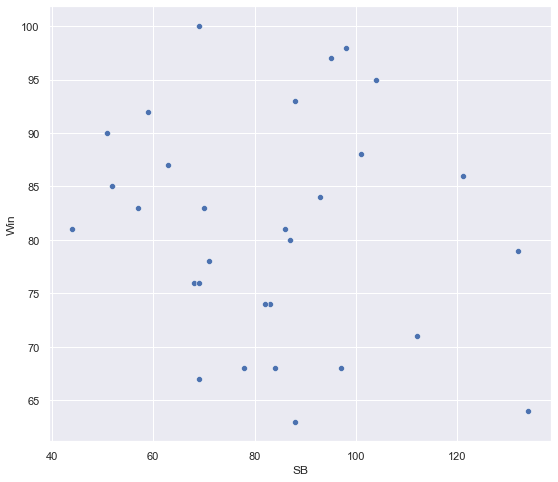

In [27]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='SB',y='Win',data=df)

If Stolen Bases are increase means chance of winnins also increase

<AxesSubplot:xlabel='RA', ylabel='Win'>

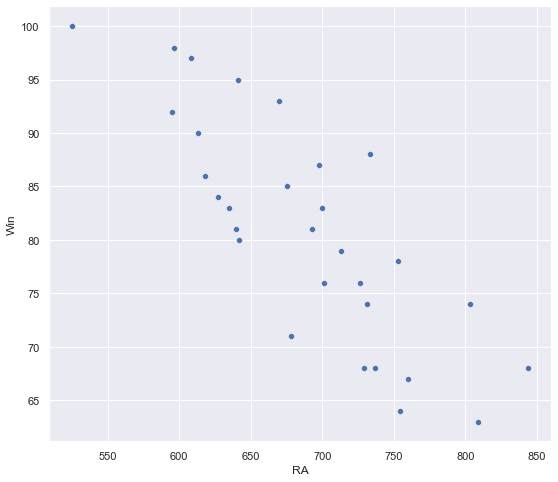

In [28]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='RA',y='Win',data=df)

Runs allowed are highly negative correlation with wins . If team allows runs means chance of winning also decrease .

<AxesSubplot:xlabel='ER', ylabel='Win'>

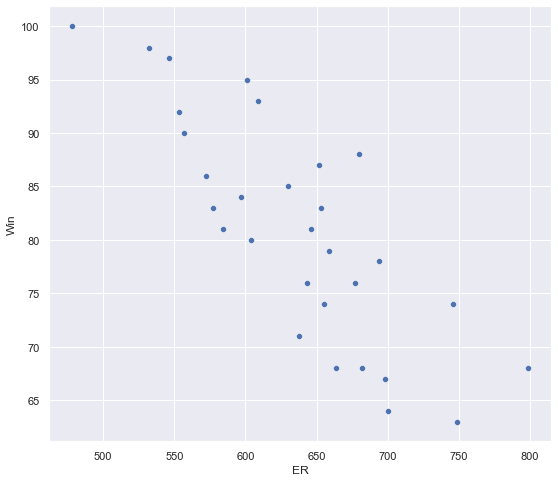

In [29]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='ER',y='Win',data=df)

Earned Run are highly negative correlation with wins . If team Earned Run increase means chance of winning also decrease .

<AxesSubplot:xlabel='ERA', ylabel='Win'>

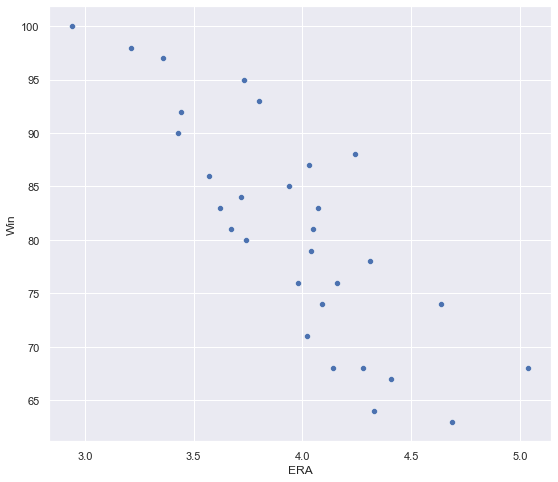

In [30]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='ERA',y='Win',data=df)

Earned Run Average are highly negative correlation with wins . If team Earned Run Average increase  means chance of winning also decrease .

<AxesSubplot:xlabel='CG', ylabel='Win'>

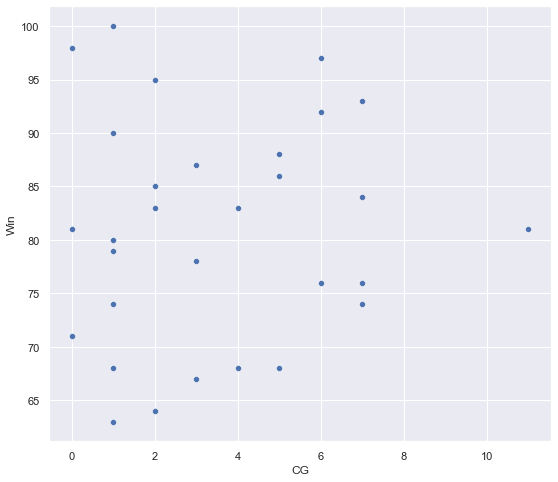

In [31]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='CG',y='Win',data=df)

Complete Games are increase means chance of winnings also increase

<AxesSubplot:xlabel='SHO', ylabel='Win'>

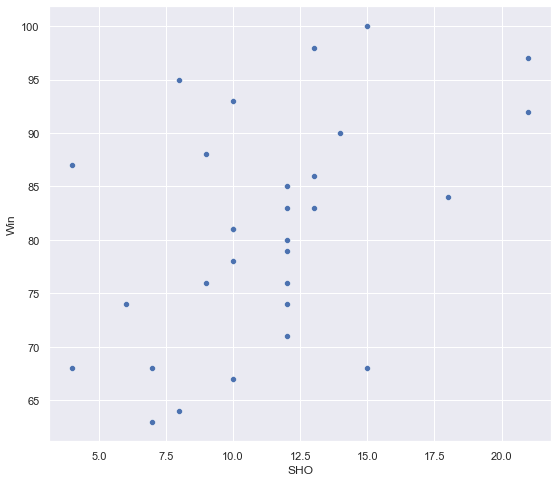

In [32]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='SHO',y='Win',data=df)

Shutouts are increase means chance of winnings also increase

<AxesSubplot:xlabel='SV', ylabel='Win'>

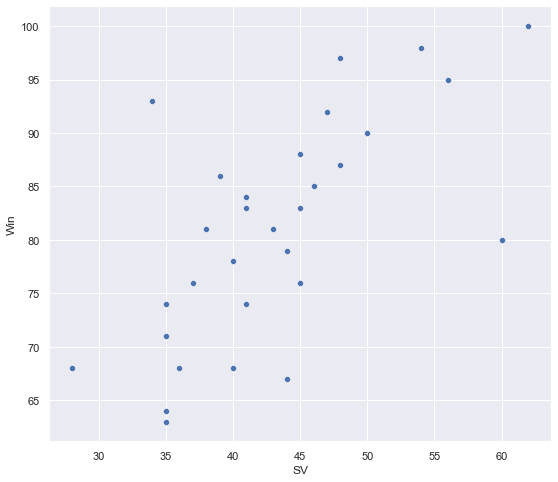

In [33]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='SV',y='Win',data=df)

Savings are increase means chance of winnings also increase

<AxesSubplot:xlabel='E', ylabel='Win'>

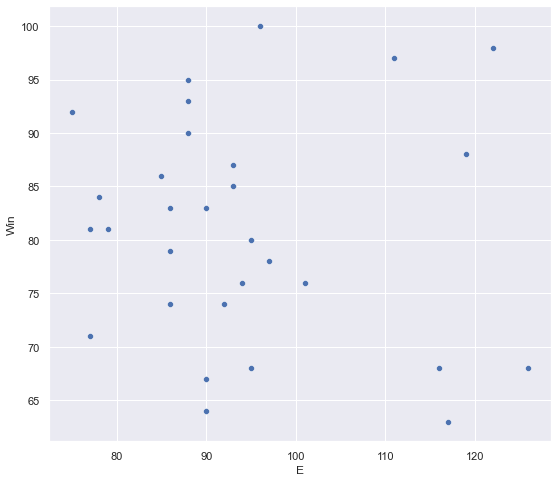

In [34]:
#scatter plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='E',y='Win',data=df)

If Errors are increased means chance of winnings are decrease

<Figure size 1440x1368 with 0 Axes>

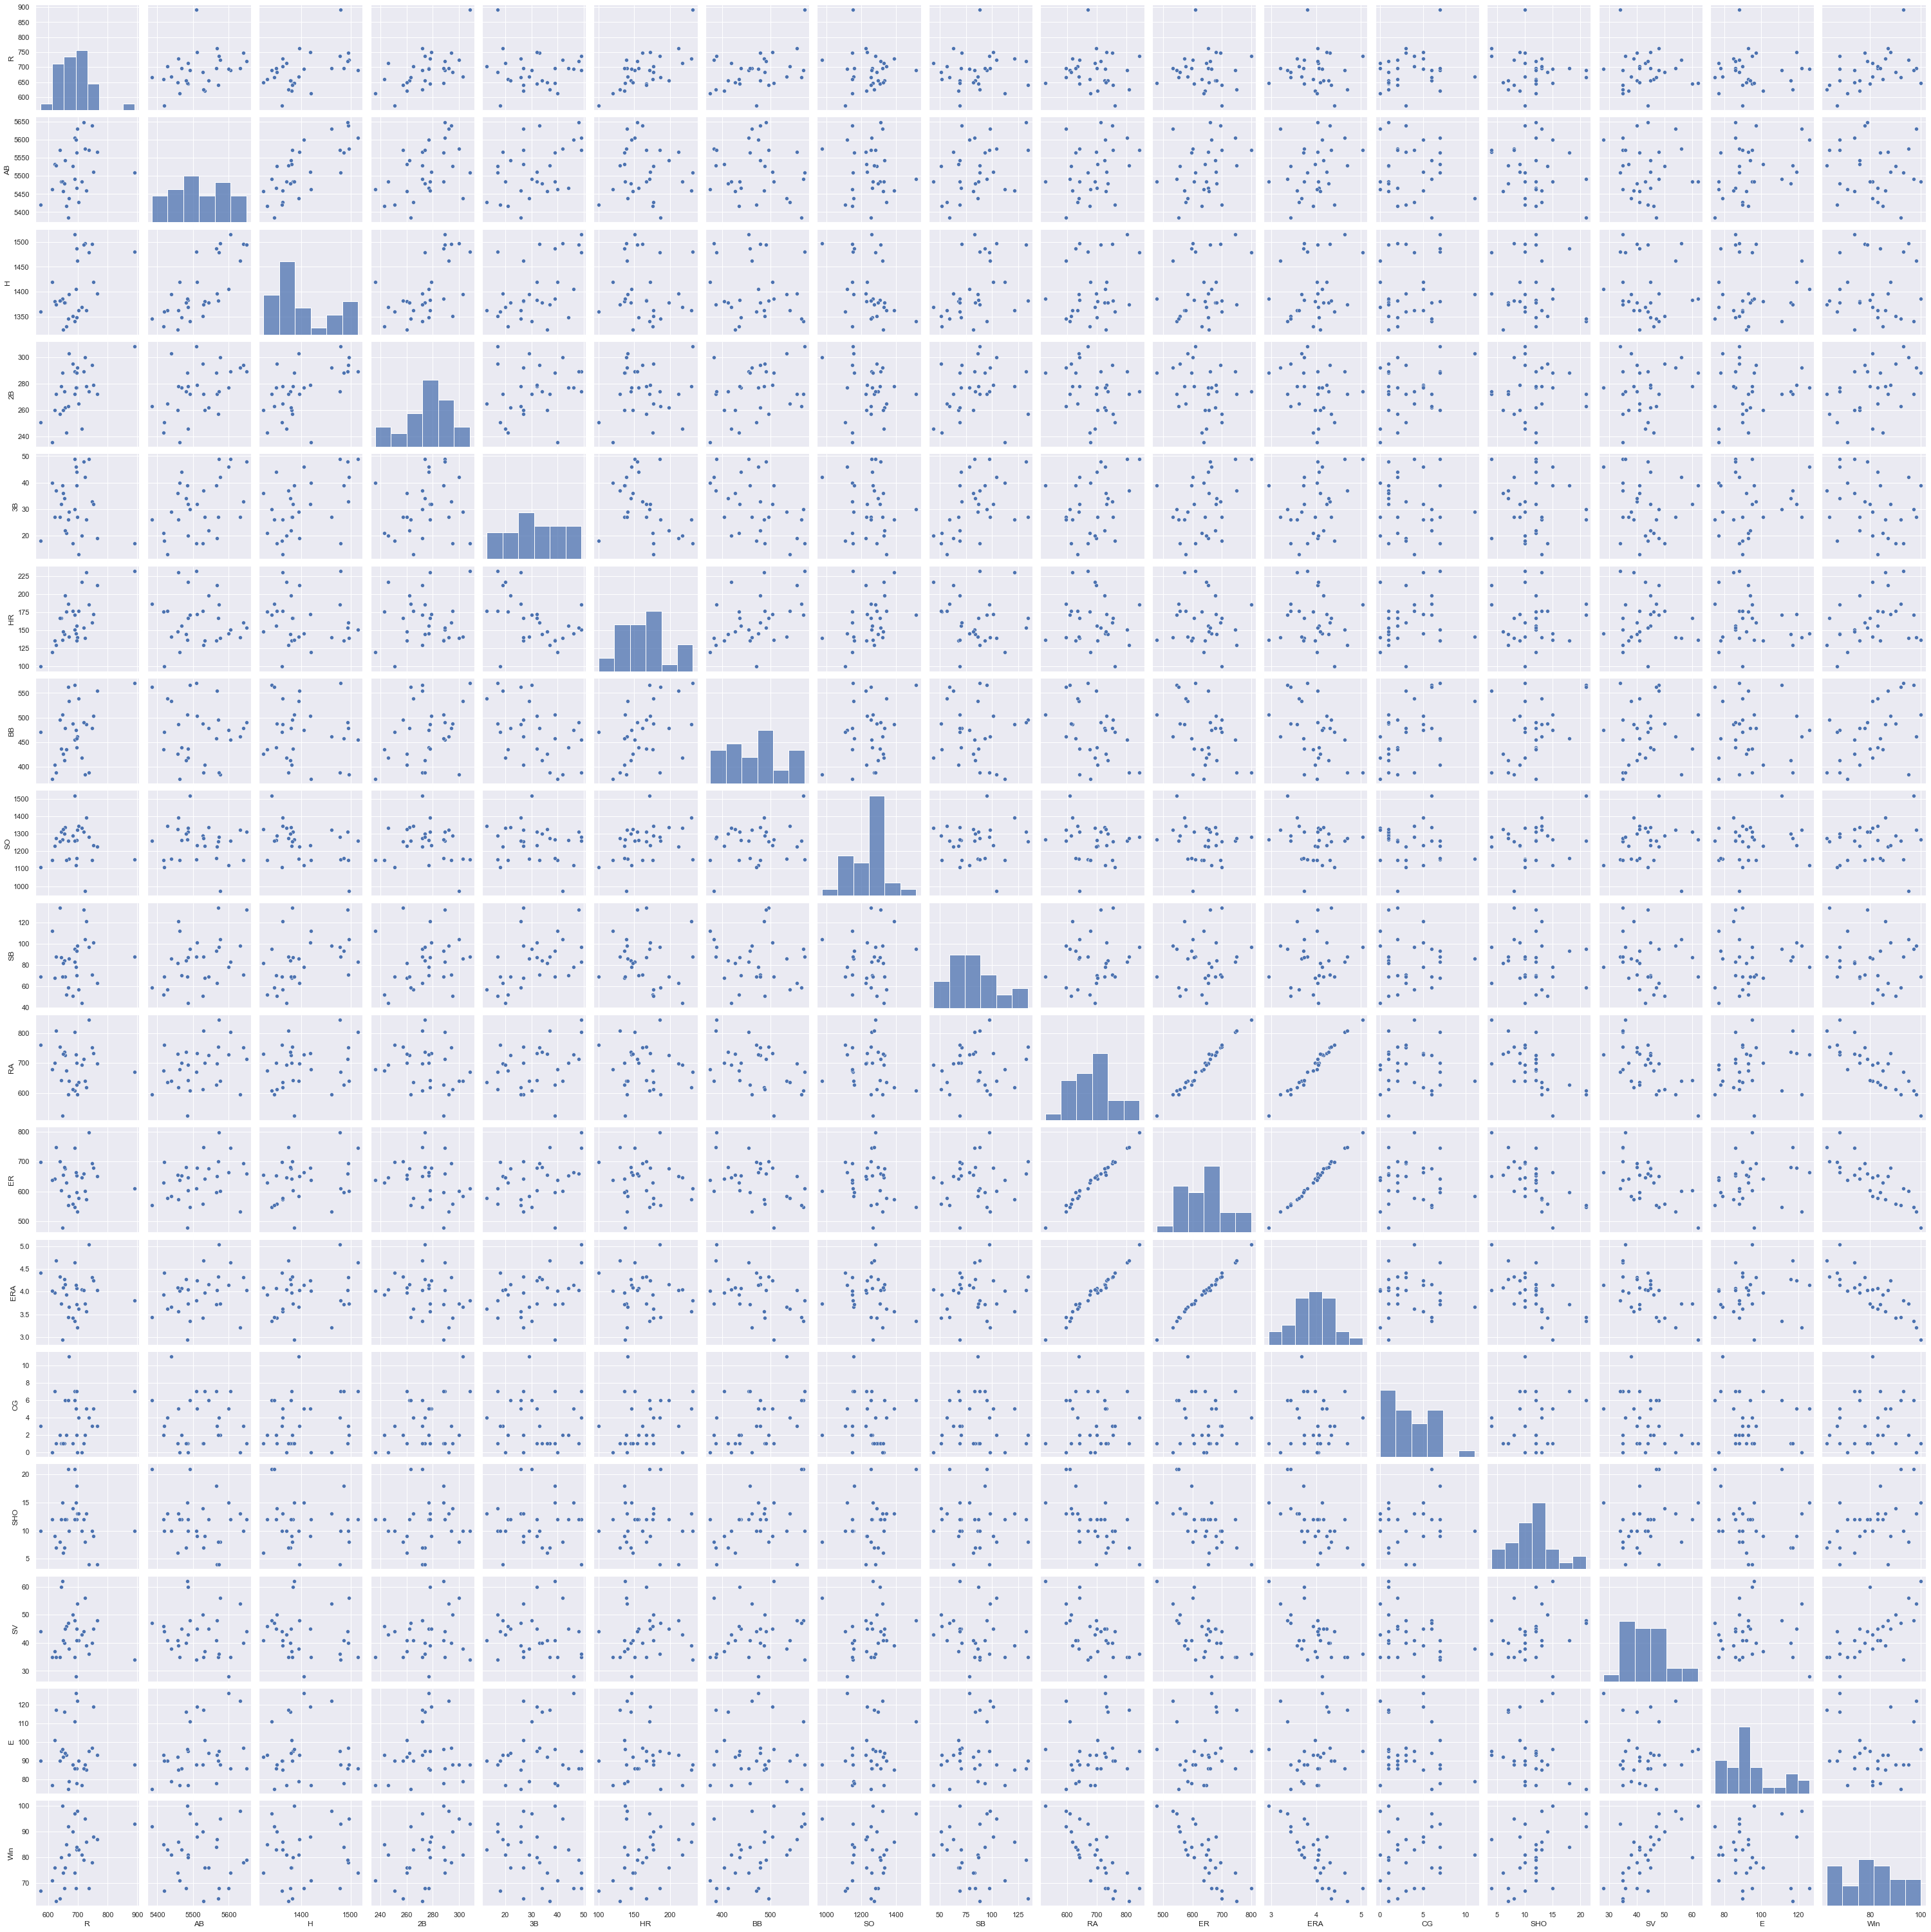

In [35]:
plt.figure(figsize=(20,19))
sns.pairplot(df)

Text(0, 0.5, 'Hits')

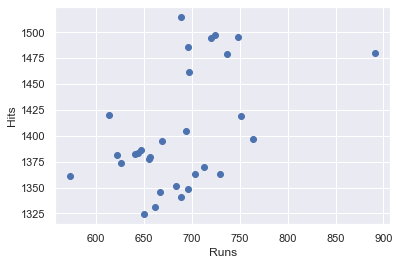

In [36]:
#scatter plot
plt.scatter(df['R'],df['H'])
plt.xlabel('Runs')
plt.ylabel('Hits')

If player want to increase Runs that means he want to increase Hits. If player will Hits the ball will then Runs will increase .

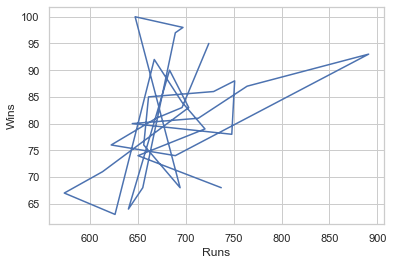

In [37]:
sns.set_style("whitegrid")
plt.plot(df['R'],df['Win'])
plt.xlabel('Runs')
plt.ylabel('Wins')
plt.show()

###### Checking Outliers

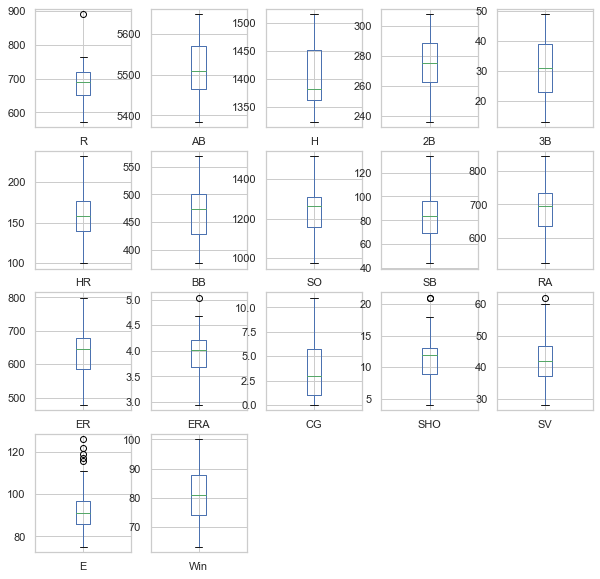

In [38]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,10))
plt.show()

Only few outliers in dataset , No need to remove them because dataset have only 30 rows and also those outliers not for away from maximum.

### Removing Outliers

In [39]:
from scipy.stats import zscore

In [40]:
z=np.abs(zscore(df))

In [41]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([0], dtype=int64))


In [42]:
z[5][0]

3.5096470447193067

In [43]:
df_new=df[(z<3).all(axis=1)]

In [44]:
df=df_new

In [45]:
#after removing outlier
df.shape

(29, 17)

###### Checking Skewness

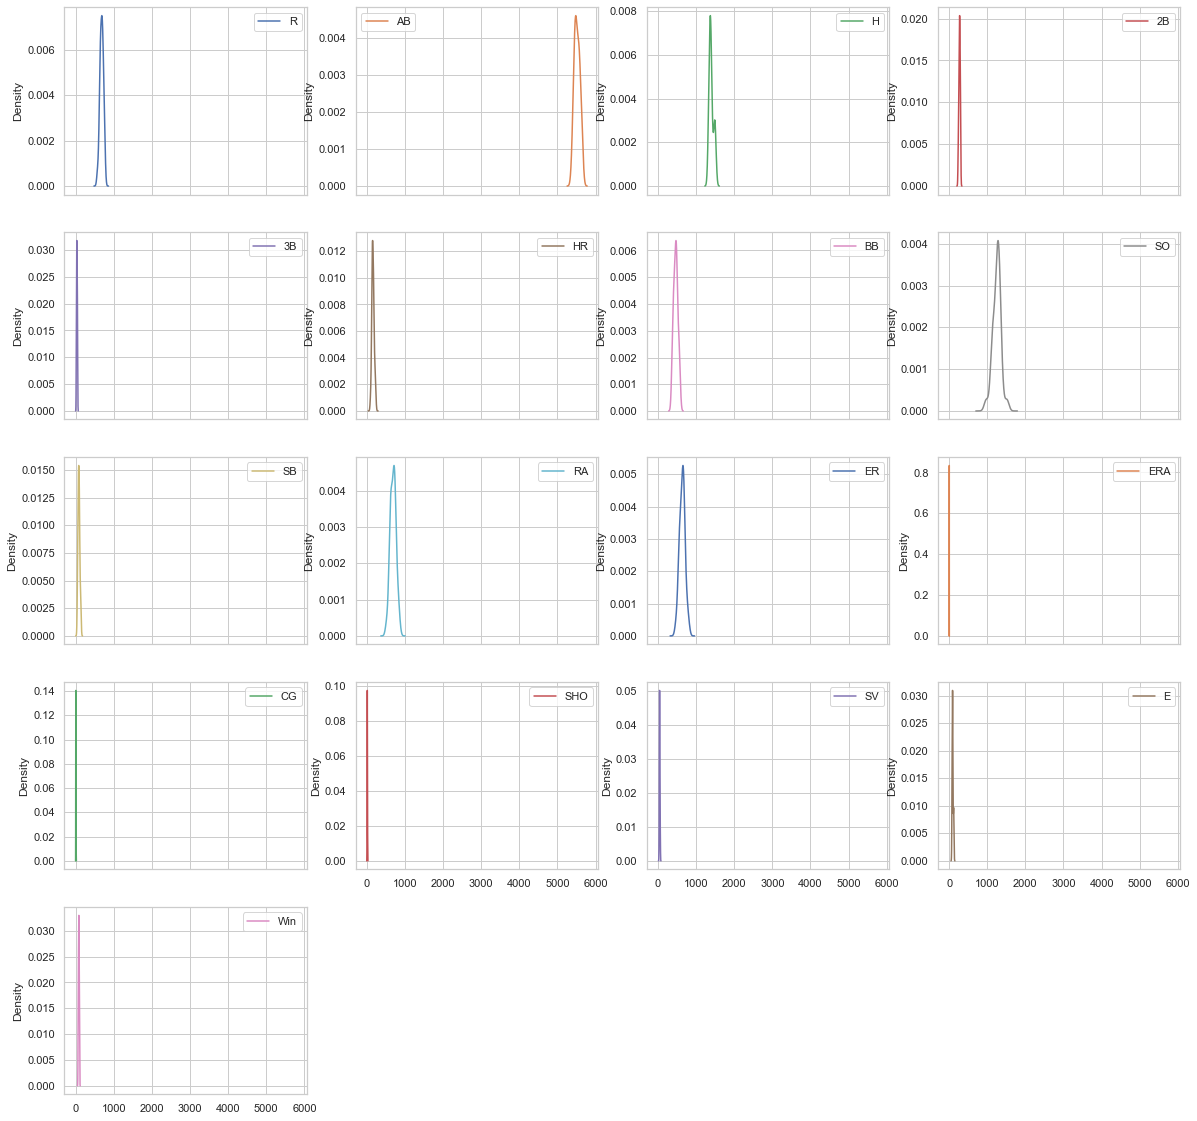

In [46]:
df.plot(kind='density',subplots=True,layout=(5,4),figsize=(20,20))
plt.show()

###### Observations:-

1. Runs column contain positive skewness
2. Hits also Positive sknewness
3. HR(Home Runs) columns also positive skewness
4. SB(Stolen Bases) also little bit positive skewness
5. CG(Complete Games) also little bit positive skewness
6. SHO(Shutouts) also little bit positive skewness
7. SV(saves) also have little bit positive skewness
8. E(Errors) columns also positive skewness

In [47]:
#checking skewness
df.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
Win    0.119013
dtype: float64

if column contain 0.25 and above that means positive skewness , if column contain -0.25 and below that means negative skewness

#### Removing Skewness

In [48]:
x=df.iloc[:,0:-1]

In [49]:
x.shape

(29, 16)

In [50]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [51]:
from scipy.stats import boxcox

In [52]:
df['R']=boxcox(df['R'],0)

<AxesSubplot:xlabel='R', ylabel='Density'>

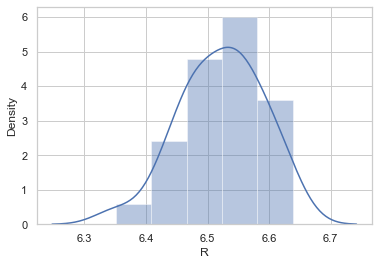

In [53]:
plt.figure()
sns.distplot(df['R'])

In [54]:
df=np.log(df)

In [55]:
df.skew()

R     -0.416344
AB     0.148157
H      0.738423
2B    -0.468491
3B    -0.521051
HR    -0.100335
BB    -0.061686
SO    -0.630142
SB    -0.133398
RA    -0.261173
ER    -0.311877
ERA   -0.347433
CG          NaN
SHO   -0.726124
SV     0.096752
E      0.583308
Win   -0.106804
dtype: float64

In [56]:
df.drop('CG',inplace=True,axis=1)

In [57]:
df_target['Win'].sort_values(ascending=False)

Win    1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: Win, dtype: float64

ER,RA,ERA are highly negative correlation with Win or target variables so remove the columns

In [58]:
df.drop('ER',inplace=True,axis=1)

In [59]:
df.drop('RA',inplace=True,axis=1)

In [60]:
df.drop('ERA',inplace=True,axis=1)

### VIF(Variance Inflation Factor)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
def vif():
    vif=pd.DataFrame()
    vif['variables']=df_new.columns
    vif['VIF Factor']=[variance_inflation_factor(df_new.values,i)for i in range(df_new.shape[1])]
    return vif

In [63]:
vif()

,variables,VIF Factor
0,R,87932.974621
1,AB,80822.080594
2,H,3866.012357
3,2B,861.044299
4,3B,33.422381
5,HR,188.441282
6,BB,258.926261
7,SO,382.492715
8,SB,28.605030
9,RA,19125.987883


If you observe here AB and H columns are almost equal VIF so drop one column.

In [64]:
#droping AB column in dataset
df.drop('AB',inplace=True,axis=1)

In [65]:
df.head()

,R,H,2B,3B,HR,BB,SO,SB,SHO,SV,E,Win
0,1.884763,7.311218,5.703782,3.737670,4.934474,5.948035,6.880384,4.644391,2.079442,4.025352,4.477337,4.553877
1,1.878755,7.207119,5.624018,3.784190,5.049856,6.084499,7.142037,4.248495,2.484907,3.806662,4.454347,4.418841
2,1.872692,7.240650,5.713733,3.367296,4.948760,6.278521,7.053586,4.454347,2.302585,3.637586,4.369448,4.394449
3,1.861432,7.230563,5.560682,3.295837,4.912655,6.001415,7.115582,4.219508,2.197225,3.610918,4.615121,4.330733
4,1.877209,7.323171,5.666427,3.891820,5.017280,6.120297,7.138073,4.418841,2.484907,3.555348,4.454347,4.304065


### Standrad scaler

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler=MinMaxScaler()

In [68]:
scale_x=df.iloc[:,0:-1]

In [69]:
scale_x.head()

,R,H,2B,3B,HR,BB,SO,SB,SHO,SV,E
0,1.884763,7.311218,5.703782,3.737670,4.934474,5.948035,6.880384,4.644391,2.079442,4.025352,4.477337
1,1.878755,7.207119,5.624018,3.784190,5.049856,6.084499,7.142037,4.248495,2.484907,3.806662,4.454347
2,1.872692,7.240650,5.713733,3.367296,4.948760,6.278521,7.053586,4.454347,2.302585,3.637586,4.369448
3,1.861432,7.230563,5.560682,3.295837,4.912655,6.001415,7.115582,4.219508,2.197225,3.610918,4.615121
4,1.877209,7.323171,5.666427,3.891820,5.017280,6.120297,7.138073,4.418841,2.484907,3.555348,4.454347


In [70]:
#applying MinMaxScaler
x=scaler.fit_transform(scale_x)

In [71]:
x.shape

(29, 11)

In [72]:
y=df.iloc[:,-1]

In [73]:
y.shape

(29,)

### Selecting Model

In [74]:
#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

In [76]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()
rfr=RandomForestRegressor()
lasso=Lasso()
ridge=Ridge()

In [77]:
list1=[lr,dtr,knr,svr,rfr,lasso,ridge]

In [78]:
myscore=0
maxrs=0
print(lr)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

LinearRegression()
Best Score:- 0.9650768659121773 
Random State:- 109


In [79]:
myscore=0
maxrs=0
print(dtr)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtr.fit(x_train,y_train)
    score=dtr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

DecisionTreeRegressor()
Best Score:- 1.0 
Random State:- 1


In [80]:
myscore=0
maxrs=0
print(knr)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    knr.fit(x_train,y_train)
    score=knr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

KNeighborsRegressor()
Best Score:- 0.7528940643238694 
Random State:- 74


In [81]:
myscore=0
maxrs=0
print(svr)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    svr.fit(x_train,y_train)
    score=svr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

SVR()
Best Score:- 0.6980090056564328 
Random State:- 105


In [82]:
myscore=0
maxrs=0

print(rfr)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rfr.fit(x_train,y_train)
    score=rfr.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

RandomForestRegressor()
Best Score:- 0.9583884849627721 
Random State:- 27


In [83]:
myscore=0
maxrs=0

print(lasso)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lasso.fit(x_train,y_train)
    score=lasso.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

Lasso()
Best Score:- 0 
Random State:- 0


In [113]:
myscore=0
maxrs=0

print(ridge)
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    ridge.fit(x_train,y_train)
    score=ridge.score(x_train,y_train)
    if score>myscore:
        myscore=score
        maxrs=i
print("Best Score:-",myscore,"\nRandom State:-",maxrs)

Ridge()
Best Score:- 0.7941307189446415 
Random State:- 109


In [93]:
#The best random state is 109 and test size radio is 80% , 20%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=109)

In [94]:
ridge.fit(x_train,y_train)

Ridge()

In [95]:
ridge.score(x_train,y_train)

0.7941307189446415

In [96]:
pred=ridge.predict(x_test)

In [99]:
print('Predicted values:-',pred)
print('Actual values:-',y_test)

Predicted values:- [4.49808504 4.42976039 4.44575522 4.25919956 4.39453077 4.46692352]
Actual values:- 20    4.499810
9     4.356709
27    4.369448
3     4.330733
2     4.394449
8     4.382027
Name: Win, dtype: float64


In [111]:
print('mean_absolute_error',mean_absolute_error(pred,y_test))
print('mean_squared_error',mean_squared_error(pred,y_test))
print('mean_squared_log_error',mean_squared_log_error(pred,y_test))
print('r2_score',r2_score(pred,y_test))

mean_absolute_error 0.051265973623168946
mean_squared_error 0.003914481480493643
mean_squared_log_error 0.00013502949747072236
r2_score 0.3375144135151378


#### cross validation

In [109]:
for model in list1:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())

LinearRegression()
[-0.54561909 -1.37293481  0.41601653  0.13098398  0.69535106]
-0.1352404689518813
DecisionTreeRegressor()
[-1.11523388 -3.013577    0.5997278   0.46277439  0.47995689]
-0.5172703594604159
KNeighborsRegressor()
[ 0.1981132  -2.25990936  0.31408893  0.20724946  0.58181149]
-0.19172925453244213
SVR()
[-0.21163188 -1.32734474  0.11004679 -0.35465743  0.33003537]
-0.29071037741836625
RandomForestRegressor()
[ 0.03791951 -3.55287699  0.43914978  0.27180531  0.77443707]
-0.4059130647877115
Lasso()
[-0.21304191 -1.18790355 -0.09507654 -0.88252071 -0.01856928]
-0.4794223968641688
Ridge()
[-0.09951205 -1.02371913  0.35559444  0.09869585  0.7312916 ]
0.012470139688571335


###### Cross validation score is very low so model may be underfitting or overfitting

In [114]:
ridge_params = {'alpha':[1,2,3,4,5,6,7,8,9,10],}
xg_grid = GridSearchCV(ridge, ridge_params, cv=3)
xg_grid.fit(x_train,y_train)
print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

Best score: 0.43120349734890623
Best score: {'alpha': 1}
Best score: Ridge(alpha=1)


### Save the model

In [115]:
import joblib
#save the model
joblib.dump(xg_grid.best_estimator_,('baseball_case_study_ridge.obj'))

['baseball_case_study_ridge.obj']

In [116]:
#load the model
ridge_load=joblib.load('baseball_case_study_ridge.obj')

In [117]:
#test the loaded model
ridge_load.predict(x_test)

array([4.39345752, 4.39171993, 4.39216014, 4.40271925, 4.45389932,
       4.38317376])